In [2]:
import os

%matplotlib inline
import matplotlib.pyplot as plt

from duke_dbt_data import dcmread_image, read_boxes, draw_box

In [3]:
df = read_boxes(boxes_fp="/data/BCS-DBT boxes-train-v2.csv", filepaths_fp="/data/BCS-DBT file-paths-train-v2.csv")

In [4]:
df.head()

,PatientID,StudyUID,View,Subject,Slice,X,Y,Width,Height,Class,AD,VolumeSlices,descriptive_path,classic_path
0,DBT-P00013,DBT-S00163,rmlo,0,16,1116,1724,218,105,benign,0,49,Breast-Cancer-Screening-DBT/DBT-P00013/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00013/1.2.826...
1,DBT-P00024,DBT-S03255,lcc,0,19,267,488,64,64,benign,0,73,Breast-Cancer-Screening-DBT/DBT-P00024/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00024/1.2.826...
2,DBT-P00024,DBT-S03255,lcc,0,37,169,384,93,85,benign,0,73,Breast-Cancer-Screening-DBT/DBT-P00024/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00024/1.2.826...
3,DBT-P00024,DBT-S03255,lmlo,0,11,471,1060,67,56,benign,0,81,Breast-Cancer-Screening-DBT/DBT-P00024/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00024/1.2.826...
4,DBT-P00024,DBT-S03255,lmlo,0,12,640,673,93,80,benign,0,81,Breast-Cancer-Screening-DBT/DBT-P00024/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00024/1.2.826...


In [8]:
df.Class.value_counts()

benign    137
cancer     87
Name: Class, dtype: int64

In [9]:
box_series = df.iloc[0]
view = box_series["View"]
slice_index = box_series["Slice"]
# if you have image data saved in classic path folder structure, read the file path from "classic_path"
# image_path = os.path.join("/data", view_series["classic_path"])
image_path = os.path.join("/data/training_set_images/", box_series["descriptive_path"])

In [13]:
%%time
image = dcmread_image(fp=image_path, view=view, index=slice_index)

CPU times: user 7.15 s, sys: 42.6 ms, total: 7.19 s
Wall time: 7.26 s


In [15]:
image.shape

(2457, 1890)

In [17]:
%%time
image_all_slices = dcmread_image(fp=image_path, view=view)

CPU times: user 8.03 s, sys: 635 ms, total: 8.66 s
Wall time: 8.68 s


In [18]:
image_all_slices.shape

(49, 2457, 1890)

In [21]:
x, y, width, height = box_series[["X", "Y", "Width", "Height"]]
image = draw_box(image=image, x=x, y=y, width=width, height=height, lw=10)
## equivalently:
# image = draw_box(image=image_all_slices[slice_index], x=x, y=y, width=width, height=height, lw=10)

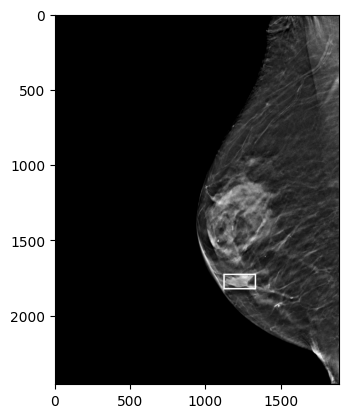

In [22]:
plt.imshow(image, cmap=plt.cm.gray);

In [24]:
len("Breast-Cancer-Screening-DBT/")

28